In [45]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [25]:
#import of review data
cols = ["user id","item id","rating","timestamp"]
#encoding using ISO-8859-1 is used because utf-8 does not support all the characters in movie names
df_data = pd.read_csv("ml-100k/u.data",sep="\t",names=cols,header=None,encoding="ISO-8859-1")

In [26]:
#import of moviedata
cols = ["movie id",
        "movie title",
        "release date",
        "video release date",
        "IMDb URL","unknown",
        "Action",
        "Adventure",
        "Animation",
        "Children's",
        "Comedy",
        "Crime",
        "Documentary",
        "Drama",
        "Fantasy",
        "Film-Noir",
        "Horror",
        "Musical",
        "Mystery",
        "Romance",
        "Sci-Fi",
        "Thriller",
        "War",
        "Western"]

df_movie = pd.read_csv("ml-100k/u.item",sep="|",names=cols,header=None,encoding="ISO-8859-1")

In [27]:
#import of user data
cols = ["user id","age","gender","occupation","zip code"]
df_user = pd.read_csv("ml-100k/u.user",sep="|",names=cols,header=None,encoding="ISO-8859-1")

In [28]:
#frequency binning the ages into age groups as it will be easier for future analysis
df_user['age_group'] = pd.qcut(df_user['age'],q=10,precision=0)

#the bins are of unequal size due to repeating values in a bin
df_user['age_group'].value_counts()

(6.0, 20.0]     109
(23.0, 26.0]    105
(35.0, 40.0]    100
(31.0, 35.0]     98
(29.0, 31.0]     96
(40.0, 46.0]     94
(46.0, 51.0]     93
(20.0, 23.0]     92
(51.0, 73.0]     85
(26.0, 29.0]     71
Name: age_group, dtype: int64

In [29]:
df_movie.drop(["movie id",
               "movie title",
               "release date",
               "video release date",
               "IMDb URL",
               "unknown"],axis=1).sum(axis = 0, skipna = True)

Action         251
Adventure      135
Animation       42
Children's     122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [30]:
df = pd.merge(pd.merge(df_data,
                  df_user[["user id",
                           "age",
                           "gender",
                           "occupation"]],
                  on='user id',
                  how='left'),
              df_movie,
              left_on = 'item id',
              right_on = 'movie id',
              how ='left')

In [31]:
df_genre = df[["rating",
                "Action",
                "Adventure",
               "Animation",
               "Children's",
                "Comedy",
                "Crime",
                "Documentary",
                "Drama",
                "Fantasy",
                "Film-Noir",
                "Horror",
                "Musical",
                "Mystery",
                "Romance",
                "Sci-Fi",
                "Thriller",
                "War",
                "Western"]]

In [32]:
def select_genre(row):
    for key,value in row.items():
        if value==1:
            return key

In [33]:
df_genre['genre']= df_genre.apply(lambda row: select_genre(row.iloc[1:]),axis=1)
df_genre.drop(["Action",
                   "Adventure",
                   "Animation",
                   "Children's",
                   "Comedy",
                   "Crime",
                   "Documentary",
                   "Drama",
                   "Fantasy",
                   "Film-Noir",
                   "Horror",
                   "Musical",
                   "Mystery",
                   "Romance",
                   "Sci-Fi",
                   "Thriller",
                   "War",
                   "Western"],
                 inplace=True,
                 axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
df_genre_grouped = df_genre.groupby(['genre']).mean().reset_index()

print(df_genre_grouped)

          genre    rating
0        Action  3.480245
1     Adventure  3.515081
2     Animation  3.634734
3    Children's  3.169730
4        Comedy  3.398842
5         Crime  3.707298
6   Documentary  3.673712
7         Drama  3.684288
8       Fantasy  1.000000
9     Film-Noir  4.064229
10       Horror  3.234555
11      Musical  3.696845
12      Mystery  3.666246
13      Romance  3.396635
14       Sci-Fi  3.454699
15     Thriller  3.310786
16          War  2.958333
17      Western  3.722892


In [41]:
df_dict = dict()

for index,row in df_genre_grouped.iterrows():
    df_dict[row[0]]=row[1]
    
df_dict

{'Action': 3.480245417953027,
 'Adventure': 3.51508120649652,
 'Animation': 3.634734239802225,
 "Children's": 3.1697301525224875,
 'Comedy': 3.3988419020880856,
 'Crime': 3.707297514033681,
 'Documentary': 3.673712021136063,
 'Drama': 3.6842883548983365,
 'Fantasy': 1.0,
 'Film-Noir': 4.0642292490118574,
 'Horror': 3.2345553292600138,
 'Musical': 3.6968449931412892,
 'Mystery': 3.6662460567823345,
 'Romance': 3.3966346153846154,
 'Sci-Fi': 3.4546994072819643,
 'Thriller': 3.3107861060329067,
 'War': 2.9583333333333335,
 'Western': 3.7228915662650603}

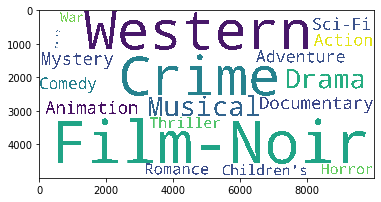

In [55]:
wc = WordCloud(background_color="white",width=10000,height=5000, max_words=18,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(df_dict)
plt.imshow(wc)